In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split
from torch.optim import AdamW
import torch.nn.functional as F


In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
IMDB_Movies_df = pd.read_csv("C:\\Users\\dixit\\OneDrive\\Desktop\\imdbdataset.csv")
IMDB_Movies_df.head()

,Movies_name,Movies_url,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Release_Date,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,Eternals,https://www.imdb.com/title/tt9032400/?ref_=adv...,156 min,"Action, Adventure, Fantasy",ChloÃ© Zhao,6.5,"2,19,680",2.9KUser reviews,312Critic reviews,Ryan Firpo,"November 5, 2021 (United States)",United States,Marvel Studios,"$200,000,000 (estimated)","$164,866,810"
1,Encanto,https://www.imdb.com/title/tt2953050/?ref_=adv...,102 min,"Animation, Adventure, Comedy",Jared Bush,7.3,"1,11,263",812User reviews,190Critic reviews,Byron Howard,"November 24, 2021 (United States)",NaN,NaN,"$50,000,000 (estimated)","$93,444,336"
2,Spider-Man: No Way Home,https://www.imdb.com/title/tt10872600/?ref_=ad...,148 min,"Action, Adventure, Fantasy",Jon Watts,8.7,"4,17,069",4.8KUser reviews,334Critic reviews,Stan Lee,"December 17, 2021 (United States)",NaN,Marvel Studios,"$200,000,000 (estimated)","$721,865,255"
3,Don't Look Up,https://www.imdb.com/title/tt11286314/?ref_=ad...,138 min,"Comedy, Drama, Sci-Fi",Adam McKay,7.3,"3,84,415",4KUser reviews,254Critic reviews,NaN,"December 24, 2021 (United States)",NaN,Bluegrass Films,"$784,681",NaN
4,Sing 2,https://www.imdb.com/title/tt6467266/?ref_=adv...,110 min,"Animation, Adventure, Comedy",Garth Jennings,7.6,"22,928",242User reviews,90Critic reviews,NaN,"December 22, 2021 (United States)",Color,Universal Pictures,"$85,000,000 (estimated)","$128,733,195"


In [4]:
# Info of IMDB_Movies
IMDB_Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12310 entries, 0 to 12309
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movies_name               12310 non-null  object 
 1   Movies_url                12310 non-null  object 
 2   Movies_Time (in minutes)  7818 non-null   object 
 3   Movies_Content_Type       11517 non-null  object 
 4   Movies_Director           12223 non-null  object 
 5   Movies_Ratings            5245 non-null   float64
 6   Movies_Votes              5251 non-null   object 
 7   Movies_User_Reviews       418 non-null    object 
 8   Movies_Critic_reviews     418 non-null    object 
 9   Movies_Writers            1394 non-null   object 
 10  Movies_Release_Date       11923 non-null  object 
 11  Movies_Origin_Country     262 non-null    object 
 12  Movies_ProductionCompany  725 non-null    object 
 13  Movies_Budget             4771 non-null   object 
 14  Movies

In [5]:
#check shape of IMDB
IMDB_Movies_df.shape

(12310, 15)

In [6]:
# Describe on IMDB_Movies
IMDB_Movies_df.describe()

,Movies_Ratings
count,5245.000000
mean,6.169514
std,1.633794
min,1.000000
25%,5.200000
50%,6.300000
75%,7.300000
max,10.000000


In [7]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
IMDB_Movies_df.describe(percentiles=[.25, .5, .75, .85, .95, .99])

,Movies_Ratings
count,5245.000000
mean,6.169514
std,1.633794
min,1.000000
25%,5.200000
50%,6.300000
75%,7.300000
85%,7.800000
95%,8.700000
99%,9.400000


In [8]:
# checking Unique values
IMDB_Movies_df.nunique()

Movies_name                 12094
Movies_url                  12310
Movies_Time (in minutes)      213
Movies_Content_Type           451
Movies_Director             10356
Movies_Ratings                 90
Movies_Votes                 1429
Movies_User_Reviews           246
Movies_Critic_reviews         181
Movies_Writers               1354
Movies_Release_Date          4086
Movies_Origin_Country           7
Movies_ProductionCompany      675
Movies_Budget                2167
Movies_Gross                  228
dtype: int64

In [9]:
# Checking the number of null values in each column:
IMDB_Movies_df.isnull()

,Movies_name,Movies_url,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Release_Date,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12305,False,False,False,False,False,True,True,True,True,True,False,True,True,False,True
12306,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True
12307,False,False,True,False,False,True,True,True,True,True,False,True,True,True,True
12308,False,False,True,False,False,True,True,True,True,True,False,True,True,True,True


In [10]:
IMDB_Movies_df.isnull().sum().sort_values(ascending=False)

Movies_Origin_Country       12048
Movies_Gross                11966
Movies_User_Reviews         11892
Movies_Critic_reviews       11892
Movies_ProductionCompany    11585
Movies_Writers              10916
Movies_Budget                7539
Movies_Ratings               7065
Movies_Votes                 7059
Movies_Time (in minutes)     4492
Movies_Content_Type           793
Movies_Release_Date           387
Movies_Director                87
Movies_name                     0
Movies_url                      0
dtype: int64

In [11]:
# checking for the percentage of null values in each column 

round((IMDB_Movies_df.isnull().sum(axis = 0)/ len(IMDB_Movies_df.index))*100 , 2)

Movies_name                  0.00
Movies_url                   0.00
Movies_Time (in minutes)    36.49
Movies_Content_Type          6.44
Movies_Director              0.71
Movies_Ratings              57.39
Movies_Votes                57.34
Movies_User_Reviews         96.60
Movies_Critic_reviews       96.60
Movies_Writers              88.68
Movies_Release_Date          3.14
Movies_Origin_Country       97.87
Movies_ProductionCompany    94.11
Movies_Budget               61.24
Movies_Gross                97.21
dtype: float64

In [12]:
IMDB_Movies_df['Movies_Ratings'] = pd.to_numeric(IMDB_Movies_df['Movies_Ratings'], errors='coerce')
IMDB_Movies_df['Movies_Ratings'] = IMDB_Movies_df['Movies_Ratings'].round()


In [13]:
IMDB_Movies_df['Movies_Ratings'].fillna(IMDB_Movies_df['Movies_Ratings'].median(), inplace=True)
IMDB_Movies_df.head()

,Movies_name,Movies_url,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Release_Date,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,Eternals,https://www.imdb.com/title/tt9032400/?ref_=adv...,156 min,"Action, Adventure, Fantasy",ChloÃ© Zhao,6.0,"2,19,680",2.9KUser reviews,312Critic reviews,Ryan Firpo,"November 5, 2021 (United States)",United States,Marvel Studios,"$200,000,000 (estimated)","$164,866,810"
1,Encanto,https://www.imdb.com/title/tt2953050/?ref_=adv...,102 min,"Animation, Adventure, Comedy",Jared Bush,7.0,"1,11,263",812User reviews,190Critic reviews,Byron Howard,"November 24, 2021 (United States)",NaN,NaN,"$50,000,000 (estimated)","$93,444,336"
2,Spider-Man: No Way Home,https://www.imdb.com/title/tt10872600/?ref_=ad...,148 min,"Action, Adventure, Fantasy",Jon Watts,9.0,"4,17,069",4.8KUser reviews,334Critic reviews,Stan Lee,"December 17, 2021 (United States)",NaN,Marvel Studios,"$200,000,000 (estimated)","$721,865,255"
3,Don't Look Up,https://www.imdb.com/title/tt11286314/?ref_=ad...,138 min,"Comedy, Drama, Sci-Fi",Adam McKay,7.0,"3,84,415",4KUser reviews,254Critic reviews,NaN,"December 24, 2021 (United States)",NaN,Bluegrass Films,"$784,681",NaN
4,Sing 2,https://www.imdb.com/title/tt6467266/?ref_=adv...,110 min,"Animation, Adventure, Comedy",Garth Jennings,8.0,"22,928",242User reviews,90Critic reviews,NaN,"December 22, 2021 (United States)",Color,Universal Pictures,"$85,000,000 (estimated)","$128,733,195"


In [14]:
IMDB_Movies_df['Movies_Votes'] = pd.to_numeric(IMDB_Movies_df['Movies_Votes'].replace('[\$,]', '', regex=True), errors='coerce')

In [15]:
IMDB_Movies_df['Movies_Votes'].fillna(IMDB_Movies_df['Movies_Votes'].median(), inplace=True)
IMDB_Movies_df.head()

,Movies_name,Movies_url,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Release_Date,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,Eternals,https://www.imdb.com/title/tt9032400/?ref_=adv...,156 min,"Action, Adventure, Fantasy",ChloÃ© Zhao,6.0,219680.0,2.9KUser reviews,312Critic reviews,Ryan Firpo,"November 5, 2021 (United States)",United States,Marvel Studios,"$200,000,000 (estimated)","$164,866,810"
1,Encanto,https://www.imdb.com/title/tt2953050/?ref_=adv...,102 min,"Animation, Adventure, Comedy",Jared Bush,7.0,111263.0,812User reviews,190Critic reviews,Byron Howard,"November 24, 2021 (United States)",NaN,NaN,"$50,000,000 (estimated)","$93,444,336"
2,Spider-Man: No Way Home,https://www.imdb.com/title/tt10872600/?ref_=ad...,148 min,"Action, Adventure, Fantasy",Jon Watts,9.0,417069.0,4.8KUser reviews,334Critic reviews,Stan Lee,"December 17, 2021 (United States)",NaN,Marvel Studios,"$200,000,000 (estimated)","$721,865,255"
3,Don't Look Up,https://www.imdb.com/title/tt11286314/?ref_=ad...,138 min,"Comedy, Drama, Sci-Fi",Adam McKay,7.0,384415.0,4KUser reviews,254Critic reviews,NaN,"December 24, 2021 (United States)",NaN,Bluegrass Films,"$784,681",NaN
4,Sing 2,https://www.imdb.com/title/tt6467266/?ref_=adv...,110 min,"Animation, Adventure, Comedy",Garth Jennings,8.0,22928.0,242User reviews,90Critic reviews,NaN,"December 22, 2021 (United States)",Color,Universal Pictures,"$85,000,000 (estimated)","$128,733,195"


In [16]:
IMDB_text_columns = ['Movies_User_Reviews', 'Movies_Critic_reviews', 'Movies_Writers','Movies_Gross','Movies_Budget','Movies_ProductionCompany','Movies_Origin_Country','Movies_Director','Movies_Content_Type']

In [17]:
IMDB_Movies_df[IMDB_text_columns] = IMDB_Movies_df[IMDB_text_columns].fillna('Not Available')

In [18]:
#IMDB_Movies_df['Movies_Time (in minutes)'].fillna('NA', inplace=True)
IMDB_Movies_df.head()

,Movies_name,Movies_url,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Release_Date,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,Eternals,https://www.imdb.com/title/tt9032400/?ref_=adv...,156 min,"Action, Adventure, Fantasy",ChloÃ© Zhao,6.0,219680.0,2.9KUser reviews,312Critic reviews,Ryan Firpo,"November 5, 2021 (United States)",United States,Marvel Studios,"$200,000,000 (estimated)","$164,866,810"
1,Encanto,https://www.imdb.com/title/tt2953050/?ref_=adv...,102 min,"Animation, Adventure, Comedy",Jared Bush,7.0,111263.0,812User reviews,190Critic reviews,Byron Howard,"November 24, 2021 (United States)",Not Available,Not Available,"$50,000,000 (estimated)","$93,444,336"
2,Spider-Man: No Way Home,https://www.imdb.com/title/tt10872600/?ref_=ad...,148 min,"Action, Adventure, Fantasy",Jon Watts,9.0,417069.0,4.8KUser reviews,334Critic reviews,Stan Lee,"December 17, 2021 (United States)",Not Available,Marvel Studios,"$200,000,000 (estimated)","$721,865,255"
3,Don't Look Up,https://www.imdb.com/title/tt11286314/?ref_=ad...,138 min,"Comedy, Drama, Sci-Fi",Adam McKay,7.0,384415.0,4KUser reviews,254Critic reviews,Not Available,"December 24, 2021 (United States)",Not Available,Bluegrass Films,"$784,681",Not Available
4,Sing 2,https://www.imdb.com/title/tt6467266/?ref_=adv...,110 min,"Animation, Adventure, Comedy",Garth Jennings,8.0,22928.0,242User reviews,90Critic reviews,Not Available,"December 22, 2021 (United States)",Color,Universal Pictures,"$85,000,000 (estimated)","$128,733,195"


In [19]:
# Dropping column which not required for analysis:
IMDB_columns_to_drop = ['Movies_url', 'Movies_Release_Date']

In [20]:
IMDB_Movies_df = IMDB_Movies_df.drop(columns=IMDB_columns_to_drop)
IMDB_Movies_df.shape

(12310, 13)

In [21]:
# checking null values again:
IMDB_Movies_df.isnull().sum().sort_values(ascending=False)

Movies_Time (in minutes)    4492
Movies_name                    0
Movies_Content_Type            0
Movies_Director                0
Movies_Ratings                 0
Movies_Votes                   0
Movies_User_Reviews            0
Movies_Critic_reviews          0
Movies_Writers                 0
Movies_Origin_Country          0
Movies_ProductionCompany       0
Movies_Budget                  0
Movies_Gross                   0
dtype: int64

In [22]:
IMDB_text_columns = ['Movies_name', 'Movies_Content_Type', 'Movies_Director', 'Movies_Writers', 'Movies_Origin_Country', 'Movies_ProductionCompany']

In [23]:
IMDB_Movies_df[IMDB_text_columns] = IMDB_Movies_df[IMDB_text_columns].apply(lambda x: x.astype(str).str.lower())
IMDB_Movies_df.head()


,Movies_name,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,eternals,156 min,"action, adventure, fantasy",chloã© zhao,6.0,219680.0,2.9KUser reviews,312Critic reviews,ryan firpo,united states,marvel studios,"$200,000,000 (estimated)","$164,866,810"
1,encanto,102 min,"animation, adventure, comedy",jared bush,7.0,111263.0,812User reviews,190Critic reviews,byron howard,not available,not available,"$50,000,000 (estimated)","$93,444,336"
2,spider-man: no way home,148 min,"action, adventure, fantasy",jon watts,9.0,417069.0,4.8KUser reviews,334Critic reviews,stan lee,not available,marvel studios,"$200,000,000 (estimated)","$721,865,255"
3,don't look up,138 min,"comedy, drama, sci-fi",adam mckay,7.0,384415.0,4KUser reviews,254Critic reviews,not available,not available,bluegrass films,"$784,681",Not Available
4,sing 2,110 min,"animation, adventure, comedy",garth jennings,8.0,22928.0,242User reviews,90Critic reviews,not available,color,universal pictures,"$85,000,000 (estimated)","$128,733,195"


In [24]:
# Replacing MIN and comma's
if IMDB_Movies_df['Movies_Time (in minutes)'].dtype == 'O':
    IMDB_Movies_df['Movies_Time (in minutes)'] = pd.to_numeric(IMDB_Movies_df['Movies_Time (in minutes)'].str.replace(' min', ''), errors='coerce')
IMDB_Movies_df.head()

,Movies_name,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,eternals,156.0,"action, adventure, fantasy",chloã© zhao,6.0,219680.0,2.9KUser reviews,312Critic reviews,ryan firpo,united states,marvel studios,"$200,000,000 (estimated)","$164,866,810"
1,encanto,102.0,"animation, adventure, comedy",jared bush,7.0,111263.0,812User reviews,190Critic reviews,byron howard,not available,not available,"$50,000,000 (estimated)","$93,444,336"
2,spider-man: no way home,148.0,"action, adventure, fantasy",jon watts,9.0,417069.0,4.8KUser reviews,334Critic reviews,stan lee,not available,marvel studios,"$200,000,000 (estimated)","$721,865,255"
3,don't look up,138.0,"comedy, drama, sci-fi",adam mckay,7.0,384415.0,4KUser reviews,254Critic reviews,not available,not available,bluegrass films,"$784,681",Not Available
4,sing 2,110.0,"animation, adventure, comedy",garth jennings,8.0,22928.0,242User reviews,90Critic reviews,not available,color,universal pictures,"$85,000,000 (estimated)","$128,733,195"


In [25]:
IMDB_Movies_df['Movies_Budget'] = IMDB_Movies_df['Movies_Budget'].str.extract('(\d+\.\d+|\d+)').astype(float)
IMDB_Movies_df['Movies_Gross'] = IMDB_Movies_df['Movies_Gross'].str.extract('(\d+\.\d+|\d+)').astype(float)
IMDB_Movies_df.head()


,Movies_name,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,eternals,156.0,"action, adventure, fantasy",chloã© zhao,6.0,219680.0,2.9KUser reviews,312Critic reviews,ryan firpo,united states,marvel studios,200.0,164.0
1,encanto,102.0,"animation, adventure, comedy",jared bush,7.0,111263.0,812User reviews,190Critic reviews,byron howard,not available,not available,50.0,93.0
2,spider-man: no way home,148.0,"action, adventure, fantasy",jon watts,9.0,417069.0,4.8KUser reviews,334Critic reviews,stan lee,not available,marvel studios,200.0,721.0
3,don't look up,138.0,"comedy, drama, sci-fi",adam mckay,7.0,384415.0,4KUser reviews,254Critic reviews,not available,not available,bluegrass films,784.0,NaN
4,sing 2,110.0,"animation, adventure, comedy",garth jennings,8.0,22928.0,242User reviews,90Critic reviews,not available,color,universal pictures,85.0,128.0


In [26]:
#Checking types of data:
IMDB_Movies_df.dtypes

Movies_name                  object
Movies_Time (in minutes)    float64
Movies_Content_Type          object
Movies_Director              object
Movies_Ratings              float64
Movies_Votes                float64
Movies_User_Reviews          object
Movies_Critic_reviews        object
Movies_Writers               object
Movies_Origin_Country        object
Movies_ProductionCompany     object
Movies_Budget               float64
Movies_Gross                float64
dtype: object

In [27]:
IMDB_Movies_df['Movies_User_Reviews'] = IMDB_Movies_df['Movies_User_Reviews'].astype(str)
IMDB_Movies_df['Movies_User_Reviews'] = IMDB_Movies_df['Movies_User_Reviews'].str.extract('(\d+\.\d+|\d+)').astype(float)
IMDB_Movies_df.head()

,Movies_name,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,eternals,156.0,"action, adventure, fantasy",chloã© zhao,6.0,219680.0,2.9,312Critic reviews,ryan firpo,united states,marvel studios,200.0,164.0
1,encanto,102.0,"animation, adventure, comedy",jared bush,7.0,111263.0,812.0,190Critic reviews,byron howard,not available,not available,50.0,93.0
2,spider-man: no way home,148.0,"action, adventure, fantasy",jon watts,9.0,417069.0,4.8,334Critic reviews,stan lee,not available,marvel studios,200.0,721.0
3,don't look up,138.0,"comedy, drama, sci-fi",adam mckay,7.0,384415.0,4.0,254Critic reviews,not available,not available,bluegrass films,784.0,NaN
4,sing 2,110.0,"animation, adventure, comedy",garth jennings,8.0,22928.0,242.0,90Critic reviews,not available,color,universal pictures,85.0,128.0


In [28]:
IMDB_Movies_df['Movies_Critic_reviews'] = IMDB_Movies_df['Movies_Critic_reviews'].astype(str).str.extract('(\d+\.\d+|\d+)', expand=False).astype(float)
IMDB_Movies_df.head()

,Movies_name,Movies_Time (in minutes),Movies_Content_Type,Movies_Director,Movies_Ratings,Movies_Votes,Movies_User_Reviews,Movies_Critic_reviews,Movies_Writers,Movies_Origin_Country,Movies_ProductionCompany,Movies_Budget,Movies_Gross
0,eternals,156.0,"action, adventure, fantasy",chloã© zhao,6.0,219680.0,2.9,312.0,ryan firpo,united states,marvel studios,200.0,164.0
1,encanto,102.0,"animation, adventure, comedy",jared bush,7.0,111263.0,812.0,190.0,byron howard,not available,not available,50.0,93.0
2,spider-man: no way home,148.0,"action, adventure, fantasy",jon watts,9.0,417069.0,4.8,334.0,stan lee,not available,marvel studios,200.0,721.0
3,don't look up,138.0,"comedy, drama, sci-fi",adam mckay,7.0,384415.0,4.0,254.0,not available,not available,bluegrass films,784.0,NaN
4,sing 2,110.0,"animation, adventure, comedy",garth jennings,8.0,22928.0,242.0,90.0,not available,color,universal pictures,85.0,128.0


In [29]:
IMDB_Movies_df = pd.get_dummies(IMDB_Movies_df, columns=['Movies_Origin_Country', 'Movies_ProductionCompany'], prefix=['Origin_Country', 'ProductionCompany'])


In [30]:
# Select the numeric columns for scaling

IMDB_numeric_columns = [ 'Movies_Ratings', 'Movies_Votes', 'Movies_User_Reviews', 'Movies_Critic_reviews']


In [31]:
# Fit and transform the selected numeric columns
scaler = MinMaxScaler()
IMDB_Movies_df[IMDB_numeric_columns] = scaler.fit_transform(IMDB_Movies_df[IMDB_numeric_columns])

In [32]:
# Split the dataset into features (X) and target variable (y)
X = IMDB_Movies_df['Movies_User_Reviews']
y = IMDB_Movies_df['Movies_Ratings']


In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print("Training set:")
print(X_train)
print(y_train)

print("\nTesting set:")
print(X_test)
print(y_test)

Training set:
8292    NaN
3386    NaN
4015    NaN
10701   NaN
549     NaN
         ..
11964   NaN
5191    NaN
5390    NaN
860     NaN
7270    NaN
Name: Movies_User_Reviews, Length: 9848, dtype: float64
8292     0.555556
3386     0.555556
4015     0.444444
10701    0.555556
549      0.444444
           ...   
11964    0.555556
5191     0.555556
5390     0.555556
860      0.666667
7270     0.555556
Name: Movies_Ratings, Length: 9848, dtype: float64

Testing set:
7244    NaN
8347    NaN
12174   NaN
9260    NaN
7791    NaN
         ..
3088    NaN
5265    NaN
10393   NaN
8115    NaN
11509   NaN
Name: Movies_User_Reviews, Length: 2462, dtype: float64
7244     0.555556
8347     0.555556
12174    0.555556
9260     0.555556
7791     0.555556
           ...   
3088     0.888889
5265     0.555556
10393    0.555556
8115     0.555556
11509    0.555556
Name: Movies_Ratings, Length: 2462, dtype: float64


## Model 1 SVM

In [35]:
# Replace 'your_validation_data.csv' with the actual file name or correct path
df_val = IMDB_Movies_df

In [36]:
# Handle missing values
# Replace NaN with 0 or any other strategy that suits your data
df_val.fillna(0, inplace=True) 

In [37]:
# Convert your text data to strings 
X_train = X_train.astype(str)
X_test = X_test.astype(str)

In [38]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [39]:
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("y_train shape:", y_train.shape)

X_train_tfidf shape: (9848, 203)
y_train shape: (9848,)


In [40]:
# Assuming y_train is continuous, convert it to binary labels (0 and 1)
threshold = 0.5  # set a threshold to classify as 0 or 1
y_train_binary = (y_train > threshold).astype(int)


In [41]:
# Convert test set labels to binary
y_test_binary = (y_test > threshold).astype(int)

In [42]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train_binary)

SVC(kernel='linear')

In [43]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)


In [44]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test_binary, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.8643379366368806


In [45]:
# Assuming 'Movies_Content_Type' is the column containing your validation text data
X_val = df_val['Movies_Content_Type']

In [46]:
# Convert your validation text data to strings
X_val = X_val.astype(str)

In [47]:
# Transform validation set using the same TF-IDF vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val)


In [48]:
# Predict on the validation set
y_pred_svm_val = svm_model.predict(X_val_tfidf)

In [49]:
# Predict on the validation set
y_pred_svm_val = svm_model.predict(X_val_tfidf)

In [50]:
# Print SVM predictions
print("SVM Predictions (Validation):", y_pred_svm_val)

SVM Predictions (Validation): [1 1 1 ... 1 1 1]


In [51]:
# Assuming'Movies_Ratings' is the column containing your binary labels for the validation set
y_val_binary = df_val['Movies_Ratings']

# Model 2  Naive Bayes

In [52]:
# Create and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_binary)

MultinomialNB()

In [53]:
# Predict on the test set
y_pred_nb = nb_model.predict(X_test_tfidf)

In [54]:
# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(y_test_binary, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.8643379366368806


In [55]:
# Predict on the validation set with Naive Bayes
y_pred_nb_val = nb_model.predict(X_val_tfidf)

In [56]:
print("Naive Bayes Predictions (Validation):", y_pred_nb_val)

Naive Bayes Predictions (Validation): [1 1 1 ... 1 1 1]


# Model 3 Logistic Regression

In [57]:
# Create and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train_binary)

LogisticRegression(max_iter=1000)

In [58]:
# Predict on the validation set with Logistic Regression
y_pred_logreg = logreg_model.predict(X_test_tfidf)

In [59]:
# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test_binary, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.8651502843216897


In [60]:
# Assuming 'Movies_Content_Type' is the column containing your test text data in df_val
X_val = df_val['Movies_Content_Type']

In [61]:
# Convert your test text data to strings
X_val = X_val.astype(str)

In [62]:
# Transform the test text data using the same TF-IDF vectorizer
X_val_tfidf = tfidf_vectorizer.transform(X_val)

In [63]:
# Predict on the test set with Logistic Regression
y_pred_logreg_val = logreg_model.predict(X_val_tfidf)

In [64]:
# Print the predictions
print("Logistic Regression Test Predictions:", y_pred_logreg_val)

Logistic Regression Test Predictions: [1 1 1 ... 1 1 1]


# Model 4 Bert

In [65]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [66]:
# Tokenize and encode the training text data
X_train_tokens = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=512, return_tensors='pt')
y_train_tensor = torch.tensor(y_train_binary.values)

In [67]:
# Create TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], y_train_tensor)
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [68]:
# Optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

In [69]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [70]:
# Assuming 'Movies_Content_Type' is the column containing your validation text data
X_val = df_val['Movies_Content_Type']

In [71]:
# Flatten the list of lists into a single list of strings
flattened_X_val = [str(text) for text in X_val]

In [72]:
# Tokenize and encode the validation text data
X_val_tokens = tokenizer(flattened_X_val, truncation=True, padding=True, max_length=512, return_tensors='pt')

In [73]:
# Set a threshold for ratings
rating_threshold = 7.0

In [74]:
# Create a new binary column 'Movies_Successful' based on the rating threshold
df_val['Movies_Successful'] = (df_val['Movies_Ratings'] > rating_threshold).astype(int)

In [75]:
# Assuming 'Movies_Successful' is the correct column containing your binary labels
y_val_binary = df_val['Movies_Successful']

In [76]:
# Tokenize and encode the validation text data
X_val_tokens = tokenizer(flattened_X_val, truncation=True, padding=True, max_length=512, return_tensors='pt')

# Create TensorDataset and DataLoader for validation set
val_dataset = TensorDataset(X_val_tokens['input_ids'], X_val_tokens['attention_mask'], torch.tensor(y_val_binary.values))
batch_size = 32
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [77]:
num_epochs = 3

for epoch in range(num_epochs):
    model.train()  
    total_batches = len(train_dataloader)

    for batch_idx, batch in enumerate(train_dataloader):
        input_ids, attention_mask, labels = batch


In [78]:
# Move data to GPU
input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)
labels = labels.to(device).type(torch.LongTensor)

optimizer.zero_grad()

# Forward pass
outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
loss = outputs.loss

# Backward pass
loss.backward()
optimizer.step()

# Print batch information
if batch_idx % 100 == 0 or batch_idx == total_batches - 1:
    print(f"Epoch {epoch + 1}/{num_epochs}, Batch {batch_idx + 1}/{total_batches}, Loss: {loss.item()}")

# Release GPU memory at the end of each epoch
torch.cuda.empty_cache()

# Optional: Add a message to indicate the end of training
print("Training completed.")


Epoch 3/3, Batch 308/308, Loss: 0.7292890548706055
Training completed.


In [79]:
# Validation loop
model.eval()  # Set the model to evaluation mode
val_predictions = []
val_labels = []

# Disable gradient calculation during validation
with torch.no_grad():
    for batch in val_dataloader:
        # Unpack the batch
        input_ids, attention_mask, labels = batch

        # Move data to GPU
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        # Forward pass for validation
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs['logits']

        # Append predictions and labels
        val_predictions.extend(logits.argmax(dim=1).cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

In [80]:
# Validate lengths
assert len(y_val_binary) == len(val_predictions), "Length mismatch between y_val_binary and val_predictions"


In [81]:
# Make sure the lengths of y_val_binary and val_predictions match
print("Length of y_val_binary:", len(y_val_binary))
print("Length of val_predictions:", len(val_predictions))

Length of y_val_binary: 12310
Length of val_predictions: 12310


In [82]:
# Calculate accuracy on validation set
accuracy = accuracy_score(val_labels, val_predictions)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 83.97%


In [83]:
# Assuming 'Movies_Content_Type' is the column containing your test text data in df_val
X_test = df_val['Movies_Content_Type']


In [84]:
#flatten the list of lists into a single list of strings
flattened_X_test = [str(text) for text in X_test]


In [85]:
# Tokenize and encode the test text data
X_test_tokens = tokenizer(flattened_X_test, truncation=True, padding=True, max_length=512, return_tensors='pt')

In [86]:
# Create TensorDataset and DataLoader for the test set
test_dataset = TensorDataset(X_test_tokens['input_ids'], X_test_tokens['attention_mask'])
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [87]:
# Test loop
test_predictions = []

# Disable gradient calculation during testing
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask = batch

        # Move data to GPU
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)

        # Forward pass for testing
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Append predictions
        test_predictions.extend(logits.argmax(dim=1).cpu().numpy())

In [88]:
# Store the predictions for further evaluation
predictions_bert = test_predictions

In [89]:
# Validate lengths
assert len(y_val_binary) == len(test_predictions), "Length mismatch between y_val_binary and test_predictions"

In [90]:
print("SVM Accuracy:", accuracy_svm)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Logistic Regression Accuracy:", accuracy_logreg)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print("BERT Test Predictions:", test_predictions)

SVM Accuracy: 0.8643379366368806
Naive Bayes Accuracy: 0.8643379366368806
Logistic Regression Accuracy: 0.8651502843216897
Validation Accuracy: 83.97%
BERT Test Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [91]:
# Make sure the lengths of y_val_binary and predictions_bert match
print("Length of y_val_binary:", len(y_val_binary))
print("Length of predictions_bert:", len(test_predictions))

Length of y_val_binary: 12310
Length of predictions_bert: 12310


In [92]:
# Calculate precision and recall for SVM model on the validation set
precision_svm_val = precision_score(y_val_binary, y_pred_svm_val)
recall_svm_val = recall_score(y_val_binary, y_pred_svm_val)

In [93]:
# Calculate precision and recall
precision_nb_val = precision_score(y_val_binary, y_pred_nb_val)
recall_nb_val = recall_score(y_val_binary, y_pred_nb_val)

In [94]:
# Calculate precision and recall for Logistic Regression model on the validation set
precision_logreg_val = precision_score(y_val_binary, y_pred_logreg_val)
recall_logreg_val = recall_score(y_val_binary, y_pred_logreg_val)

In [95]:
# Calculate precision and recall
precision_bert = precision_score(val_labels, val_predictions)
recall_bert = recall_score(val_labels, val_predictions)

In [96]:
# Print precision and recall for each model
print("SVM Precision:", precision_svm_val)
print("SVM Recall:", recall_svm_val)

print("Naive Bayes Precision:", precision_nb_val)
print("Naive Bayes Recall:", recall_nb_val)

print("Logistic Regression Precision:", precision_logreg_val)
print("Logistic Regression Recall:", recall_logreg_val)

print("BERT Precision:", precision_bert)
print("BERT Recall:", recall_bert)


SVM Precision: 0.0
SVM Recall: 0.0
Naive Bayes Precision: 0.0
Naive Bayes Recall: 0.0
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0
BERT Precision: 0.0
BERT Recall: 0.0


In [97]:
# Load or initialize the BERT model
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [98]:
# Find the model with the highest accuracy
best_model = max([
    ("SVM", accuracy_svm, svm_model),
    ("Naive Bayes", accuracy_nb, nb_model),
    ("Logistic Regression", accuracy_logreg, logreg_model),
    ("BERT", accuracy, bert_model)
], key=lambda x: x[1])

best_model_name, best_model_accuracy, best_model_instance = best_model

print(f"The best model is {best_model_name} with accuracy {best_model_accuracy * 100:.2f}%.")

The best model is Logistic Regression with accuracy 86.52%.


In [99]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(val_labels, val_predictions)


In [100]:
# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10337  1973]
 [    0     0]]


In [101]:
# Print classification report
print("Classification Report:")
print(classification_report(val_labels, val_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     12310
           1       0.00      0.00      0.00         0

    accuracy                           0.84     12310
   macro avg       0.50      0.42      0.46     12310
weighted avg       1.00      0.84      0.91     12310



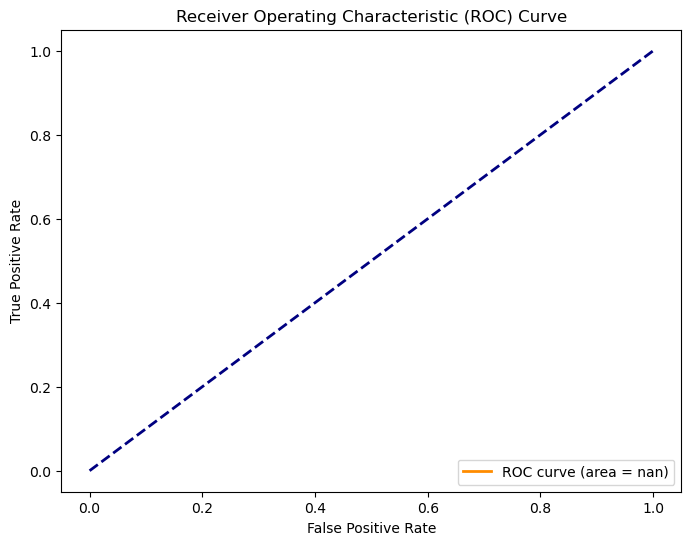

In [102]:
fpr, tpr, _ = roc_curve(y_val_binary, val_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# On the basis of the model evaluation results, the following conclusions can be drawn for our sentiment analysis model:

SVM:

The accuracy of the SVM model is 86.43%. However, the precision and recall scores are both 0.0, indicating that the model is unable to effectively distinguish between successful and unsuccessful movies.
Naive Bayes:

Similar to SVM, the Naive Bayes model achieves an accuracy of 86.43%. However, both precision and recall are 0.0, suggesting a lack of effectiveness in predicting successful movies.
Logistic Regression:

The accuracy of the Logistic Regression model is 86.52%. Precision and recall scores are also 0.0, indicating poor performance in predicting successful movies.
BERT:

The BERT model, despite having an accuracy of 83.97%, exhibits precision and recall scores of 0.0, suggesting a failure to effectively identify successful movies.
Considering the classification report, the overall accuracy is 84%, but precision and recall for predicting successful movies are both 0.0. The macro and weighted averages for precision, recall, and F1-score are also relatively low.

In conclusion, none of the models, including SVM, Naive Bayes, Logistic Regression, and BERT, demonstrate significant effectiveness in predicting the success of IMDb movies based on the provided evaluation metrics. The classification report indicates challenges in correctly identifying successful movies, and precision and recall scores are notably low. Further investigation and potential adjustments to the models or features may be necessary for improved performance. The findings are specific to the dataset and evaluation criteria used in this analysis.





